<span class="burk">EJERCICIO</span>

Realice el analisis de regresion lineal de la base de datos obtenida en: https://jllopisperez.com/2014/01/12/explotacion-de-una-base-de-datos-1-base-de-datos/

EL objetivo es analizar la variable valoracion general en terminos de las otras variables cuantitativas. Por ahora no sabemos procesar variable cualitativas, asi que sera mejor ignorar esas por ahora.

In [16]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('seaborn') 

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [17]:
datos = pd.read_csv('libro1.csv')
datos.head()

,S,E,DI,C,D,P1,P2,P3,P4,P5,P6,P7,P8,VG
0,h,52,2,NO,1,3,4,4,4,4,2,1,SI,7
1,h,78,4,NO,2,2,3,3,4,4,5,4,SI,8
2,h,34,3,NO,3,2,2,4,4,4,1,2,NO,6
3,h,45,6,SI,4,4,3,3,3,3,4,4,SI,6
4,h,47,8,SI,1,5,5,2,2,2,3,3,SI,5


In [25]:
datosf=datos.drop(['S', 'C', 'P8'], axis=1)

In [26]:
datosf

,E,DI,D,P1,P2,P3,P4,P5,P6,P7,VG
0,52,2,1,3,4,4,4,4,2,1,7
1,78,4,2,2,3,3,4,4,5,4,8
2,34,3,3,2,2,4,4,4,1,2,6
3,45,6,4,4,3,3,3,3,4,4,6
4,47,8,1,5,5,2,2,2,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...
95,84,40,1,5,4,1,2,2,5,4,6
96,45,2,3,2,2,2,3,4,4,3,6
97,44,3,2,2,2,2,2,2,2,2,4
98,40,4,2,4,5,4,5,4,5,4,9


In [27]:
datosf.columns

Index(['E', 'DI', 'D', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'VG'], dtype='object')

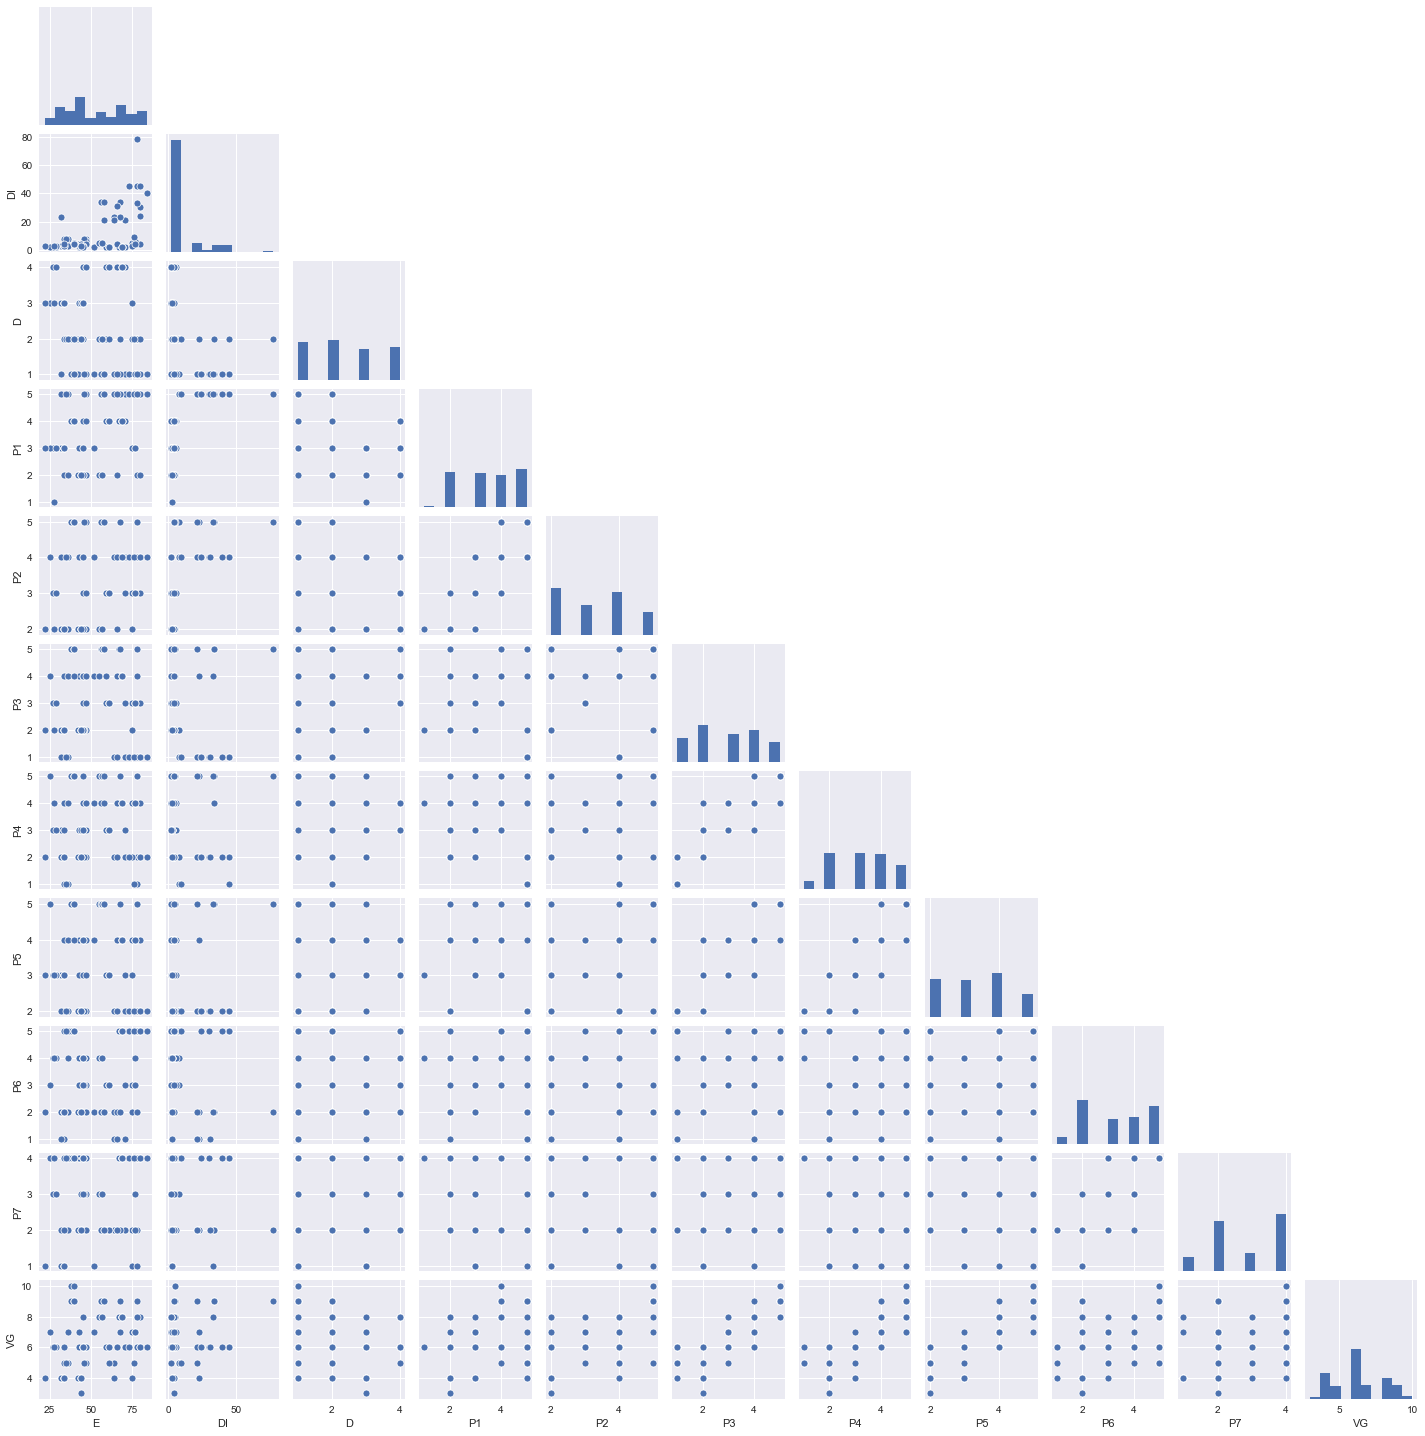

In [28]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
sns.pairplot(datos, height=1.8, diag_kind = 'hist', corner = True)

In [31]:
# Comprobando la normalidad de las variables
# ==============================================================================
print('E: ', stats.shapiro(datosf['E'])[1])
print('DI: ', stats.shapiro(datosf['DI'])[1])
print('D: ', stats.shapiro(datosf['D'])[1])
print('P1: ', stats.shapiro(datosf['P1'])[1])
print('P2: ', stats.shapiro(datosf['P2'])[1])
print('P3: ', stats.shapiro(datosf['P3'])[1])
print('P4: ', stats.shapiro(datosf['P4'])[1])
print('P5: ', stats.shapiro(datosf['P5'])[1])
print('P6: ', stats.shapiro(datosf['P6'])[1])
print('P7: ', stats.shapiro(datosf['P7'])[1])
print('VG: ', stats.shapiro(datosf['VG'])[1])
#LOS DATOS NO SON NORMALES PRUEBA KENDALL

E:  0.00015172430721577257
DI:  6.222082954930857e-15
D:  1.6817653047951353e-08
P1:  4.693913524533855e-08
P2:  9.191677641240403e-09
P3:  1.6314203321599052e-06
P4:  2.8087326882086927e-06
P5:  4.734988223731307e-08
P6:  4.574024004000421e-08
P7:  3.527494130128872e-10
VG:  4.215594890411012e-05


In [36]:
corr_test1 = stats.kendalltau(x = datos['E'], y =  datos['VG'])
corr_test1

KendalltauResult(correlation=0.250991496185063, pvalue=0.000766550875441706)

In [41]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datosf.corr(method='kendall')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
83,P5,P4,0.859307,0.859307
73,P4,P5,0.859307,0.859307
71,P4,P3,0.827857,0.827857
61,P3,P4,0.827857,0.827857
62,P3,P5,0.789070,0.789070
82,P5,P3,0.789070,0.789070
97,P6,P7,0.760693,0.760693
107,P7,P6,0.760693,0.760693
116,VG,P4,0.741616,0.741616
76,P4,VG,0.741616,0.741616


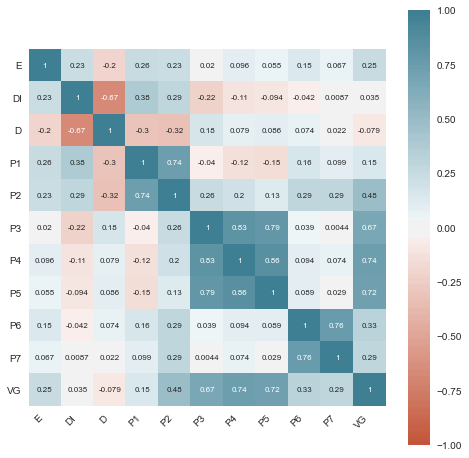

In [43]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corr_matrix, annot = True, cbar = True, annot_kws = {"size": 8}, vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n=200), square = True, ax = ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, horizontalalignment = 'right')
ax.tick_params(labelsize = 10)

In [44]:
# División de los datos en train y test
# ==============================================================================
X = datos[['E', 'DI', 'D', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']]
y = datos['VG']

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size = 0.2, random_state = 0, shuffle = True)

In [45]:
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercepto del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     106.2
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           7.72e-38
Time:                        19:38:48   Log-Likelihood:                -40.585
No. Observations:                  80   AIC:                             103.2
Df Residuals:                      69   BIC:                             129.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2042      0.351     -0.582      0.5

El p-valor de la variable DI, D, P1,P6 es mayor al 5%, por lo tanto se acepta la hipotesis nula que afirma que esa variable no aporta al modelo, y por lo tanto la podemos retirar. El  𝑅2=0.939  es alto, lo que implica que el modelo se ajusta muy bien a los datos, explicando hasta el 93.9% la variabilidad observada en la VG variabilidad general. Se procede a elimiar las variables.

In [46]:
X_train

,const,E,DI,D,P1,P2,P3,P4,P5,P6,P7
43,1.0,34,3,3,3,2,2,2,3,2,1
62,1.0,47,6,1,4,3,3,3,3,4,4
3,1.0,45,6,4,4,3,3,3,3,4,4
71,1.0,61,2,4,4,3,3,3,3,3,2
45,1.0,80,30,1,5,4,1,2,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,45,2,3,2,2,2,3,4,4,3
67,1.0,58,34,1,5,5,5,4,5,2,2
64,1.0,61,2,4,4,3,3,3,3,3,2
47,1.0,44,4,2,2,2,2,2,2,2,2


In [48]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = ['DI','D','P1','P6'])
X_test  = X_test.drop(columns = ['DI','D','P1','P6'])

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     170.8
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           6.85e-41
Time:                        19:45:15   Log-Likelihood:                -44.023
No. Observations:                  80   AIC:                             102.0
Df Residuals:                      73   BIC:                             118.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6320      0.264     -2.392      0.0

In [49]:
X_train

,const,E,P2,P3,P4,P5,P7
43,1.0,34,2,2,2,3,1
62,1.0,47,3,3,3,3,4
3,1.0,45,3,3,3,3,4
71,1.0,61,3,3,3,3,2
45,1.0,80,4,1,2,2,4
...,...,...,...,...,...,...,...
96,1.0,45,2,2,3,4,3
67,1.0,58,5,5,4,5,2
64,1.0,61,3,3,3,3,2
47,1.0,44,2,2,2,2,2


In [50]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'P3')
X_test  = X_test.drop(columns = 'P3')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           1.66e-41
Time:                        19:48:57   Log-Likelihood:                -45.434
No. Observations:                  80   AIC:                             102.9
Df Residuals:                      74   BIC:                             117.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6670      0.266     -2.506      0.0

In [52]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci['valores'] = [modelo.params[0], modelo.params[1], modelo.params[2],modelo.params[3]
                           ,modelo.params[4],modelo.params[5]]
intervalos_ci

,2.5%,97.5%,valores
const,-1.197375,-0.136577,-0.666976
E,0.003766,0.017007,0.010387
P2,0.400316,0.607712,0.504014
P4,0.158200,0.571218,0.364709
P5,0.595317,1.033163,0.814240
P7,0.214836,0.409573,0.312205


In [53]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train
residuos_train

43    0.178540
62    0.118903
3     0.098130
71   -0.360093
45   -0.213273
        ...   
96    0.096152
67   -0.390036
64    0.639907
47   -0.219629
44    1.264299
Length: 80, dtype: float64

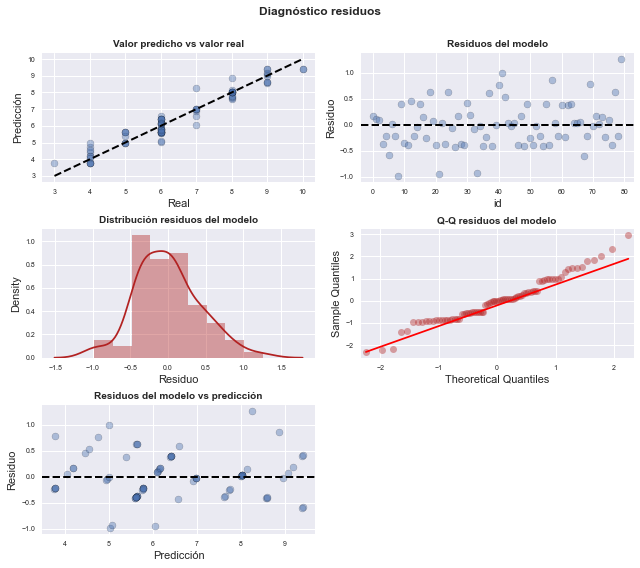

In [54]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.distplot(residuos_train, kde = True, color = "firebrick", ax= axes[1, 0], hist_kws={'linewidth': 1})
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Los residuos no parecen distribuirse de forma aleatoria en torno a cero, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a una falta de homocedasticidad y de distribución normal.

In [55]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
43,4.178540,0.144302,3.891012,4.466069,3.248384,5.108697
62,6.118903,0.079979,5.959542,6.278264,5.220063,7.017743
3,6.098130,0.081362,5.936012,6.260248,5.198797,6.997463
71,5.639907,0.074748,5.490967,5.788846,4.742855,6.536958


In [56]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(y_true  = y_test, y_pred = predicciones, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.5210494948150539


El modelo de regresión lineal múltiple:

        ValoracionGeneral(VG)= -0.6670 + 0.0104*E + 0.5040*P2 + 0.3647*P4 + 0.8142*P5 + 0.3122*P7 
 
es capaz de explicar el 93.1% de la varianza observada en las ventas (R-squared: 0.931, Adj. R-squared: 0.926). Por lo que hay evidencias claras de que el modelo es capaz de explicar la varianza en la VALORACIÓN GENERAL mejor de lo esperado por azar. Los test estadísticos para cada variable confirman que tv y radio están relacionadas con la cantidad de ventas y contribuyen al modelo.

No se satisfacen las condiciones de normalidad, por lo que los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.

El error (rmse) de test es de 0.5210. Las predicciones del modelo final se alejan en promedio 0.5210 unidades del valor real.